<a href="https://colab.research.google.com/github/Karishma-Kuria/DL-FasiAI/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient Descent**

In this colab I have showcased Gradient Descent without using any library.
It is the important part of machine learning algorithms.
This algorithm provides the results by recursively iterating with some initial parameters and then minimizing some cost or gradient function which is the descent part. The best result is achieved by taking the differentiation of the variables or properties involved towards the direction of the downhill slope or decreasing slope.

In [37]:
# imorting relevant libraries for creating data and plotting graphs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create Data

### Here I have created the data of points that follow x=y equation.

In [38]:
np.random.seed(42)
x_data = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y_data = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

### Plotting the data to check the relation between them

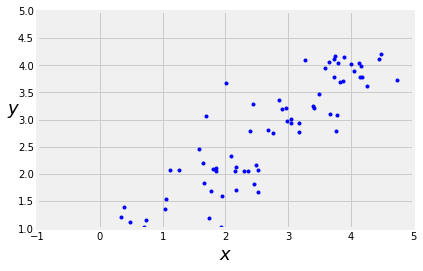

In [39]:
plt.plot(x_data,y_data,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-1,5,1,5])

### Gradient Descent Class

### Here I have used learning raye = 0.01 for 1000 number of iterations.

In [40]:
class gradient_Descent_LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X_value, y_value):
        b = 0
        m = 5
        n = X_value.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y_value - m*X_value + b) / n
            m_gradient = -2 * np.sum(X_value*(y_value - (m*X_value + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X_value):
        return self.m*X_value + self.b

### Applying Gradient descent on the above created data.

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

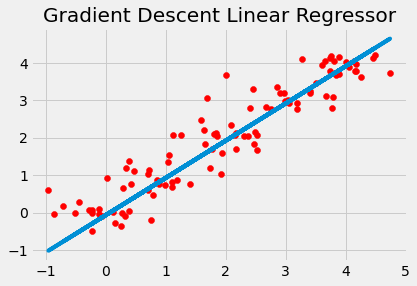

In [41]:
model = gradient_Descent_LinearRegression()
model.fit(x_data, y_data)

plt.style.use('fivethirtyeight')

plt.scatter(x_data, y_data, color='red')
plt.plot(x_data, model.predict(x_data))
plt.gca().set_title("Gradient Descent Linear Regressor")

The result of the model is very close to ideal solution for m=1 and b=0.

### Stochastic Gradient Descent

The below 'gradient_descent_stocashtic' function uses following parameters:


1.   X_value: Matrix of X with bias units added
2.   y_value: Vector of Y
3.   theta:   Vector of thetas np.random.randn(j,1)
4.   learning_rate
5.   iterations: number of iterations

And this function returns the final theta vector and cost history array over total number of iterations.

I have also added the 'cost_cal' function which calculates the cost for given x and y.

In [42]:
def  cost_cal(theta,x,y):
    m = len(y)
    
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent_stocashtic(X_value,y_value,theta,learning_rate=0.01,iterations=10):
    m = len(y_value)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X_value[rand_ind,:].reshape(1,X_value.shape[1])
            y_i = y_value[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_cal(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

For learning rate 0.5 and 50 iterations I have called the stochastic gradient descent function.

In [45]:
lrate =0.5
total_iter = 50

theta = np.random.randn(2,1)

# data to points
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

X = np.c_[np.ones((len(X),1)),X]
theta,cost_history_val = gradient_descent_stocashtic(X,y,theta,lrate,total_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history_val[-1]))

Theta0:          4.050,
Theta1:          3.295
Final cost/MSE:  50.646


Plotting Theata and iteration graph.

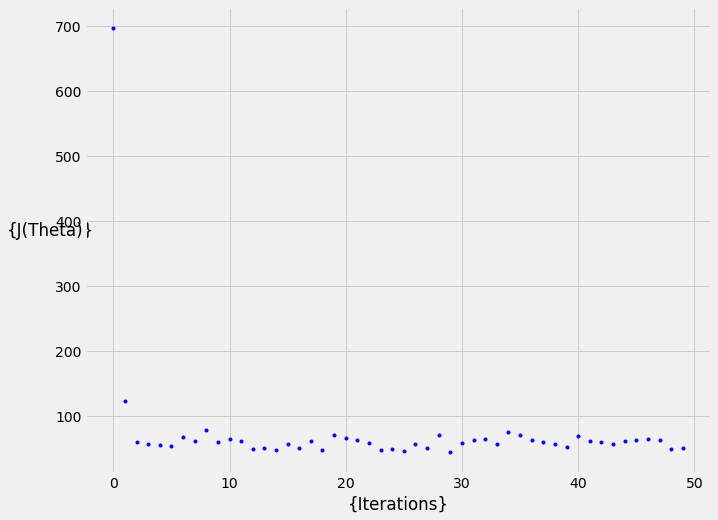

In [46]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(total_iter),cost_history_val,'b.')

The best advantage of using Gradient Descent is that here we don't require to have any fundamental pre-occupied knowledge of the model. We can apply the classifier build in above steps without having knowledge of linear regression. It can be applied to any model metric till the time it has 2 features, 1. its concave and 2. Differentiable.